# $$ Pracownia \ z \ analizy \ numerycznej $$

## $$  Prezentacja \ programu \ do \ zadania \ \textbf{P1.2} $$
### $$ Prowadzący: \ dr \ Rafał \ Nowak $$
### $$ Mateusz \ Hazy $$
### $$ Wrocław, \ dnia \ 2 \ listopada \ 2017 $$

# Wstęp

Wszelkie operacje arytmetyczne niosą ze sobą ryzyko błędu w arytmetyce zmiennopozycyjnej.
Można  powiedzieć, że  są one nieuniknione. Jednak istnieją sposoby, aby błędy zminimalizować. W dalszych  paragrafach można znaleźć wyniki sumowania ciągów  $\frac{1}{n^2}$ oraz $\frac{1}{n}$ przy  użyciu różnych metod oraz precyzji.


# Opis  Programu

Do przeprowadzenia eksperymentu został użyty program zamieszczony poniżej, dzięki któremu można łatwo porównywać względne błędy sumowania oraz doświadczalnie szacować asymptotyczne tempo wzrostu błędu.

In [2]:
using PyPlot

In [3]:
plotdx = 100
plotMax = 10000

# zwraca n-ty element ciągu 1/n^2
function squareSum(T, n)
    return T(1)/T(n)/T(n)
end

# zwraca n-ty element ciągu 1/n
function linearSum(T, n)
    return T(1)/T(n)
end

# sumowanie elementów ciągu określonego przez sumElement
# T - typ zmiennopozycyjny
# arr - permutacja indeksów określająca kolejność sumowania
function sum(T, arr, sumElement)
    s = sumElement(T, arr[1])
    results = []
    for i in 2:length(arr)
        k = T(arr[i])
        s += sumElement(T, k)
        if  i % plotdx == 0
            push!(results, T(s))
        end
    end
    return results
end

# sumowanie z poprawkami (algorytm Kahana)
# parametry tak samo, jak w funkcji sum
function sumWithCorrection(T, arr, sumElement)
    s = sumElement(T, arr[1])
    c = T(0)
    results=[]
    for i in 2:length(arr)
        k = T(arr[i])
        y = T(c + sumElement(T, k))
        t = T(s + y)
        c = (s - t) + y
        s = t
        if i % plotdx == 0
            push!(results, T(s))
        end
    end
    return results
end

# funkcja obliczająca błędy względne dla kolejnych iteracji sumowania
# sumAlgorithm - wybrany algorytm sumowania
# sumElement - wybrany ciąg
function sumMistakes(T, arr, sumAlgorithm, sumElement)
    setprecision(BigFloat, 2048)
    good = sum(BigFloat, arr, sumElement)
    checked = sumAlgorithm(T, arr, sumElement)
    mistakes=[]
    for i in 1:length(good)
        push!(mistakes, Float64(abs(good[i]-checked[i])/good[i]))
    end
    return mistakes
end

# funkcja obliczająca iloraz kolejnych błędów względnych 
# i wartości n*2^(-exp*t), gdzie exp jest wykładnikiem tempa wzrostu,
# a t precyzją arytmetyki typu T
function empiricComplexity(T, arr, exp)
    results = []
    t = precision(T)
    for i in 1:length(arr)
        ratio = BigFloat(arr[i])/(BigFloat(i * plotdx) * BigFloat(2.0 ^ (-exp*t)))
        push!(results, Float64(ratio))
    end
    return results
end

# funkcje pomocnicze
function getPlotX()
    res = [1:(plotMax/plotdx);] .* plotdx
    return res
end

function endResults(a, b, c)
    println("Końcowy błąd względny")
    println("Zwykłe sumowanie: ", a)
    println("Sumowanie z poprawkami: ", b)
    println("Sumowanie w odwrotnej kolejności: ", c)
end

function initPlot(t, x, y)
    title(t)
    ylabel(y)
    xlabel(x)
end

show()

 # Sumowanie ciągu $\frac{1}{n^2}$

Końcowy błąd względny
Zwykłe sumowanie: 6.64155593335396e-5
Sumowanie z poprawkami: 1.8392493992686237e-8
Sumowanie w odwrotnej kolejności: 1.8392493992686237e-8

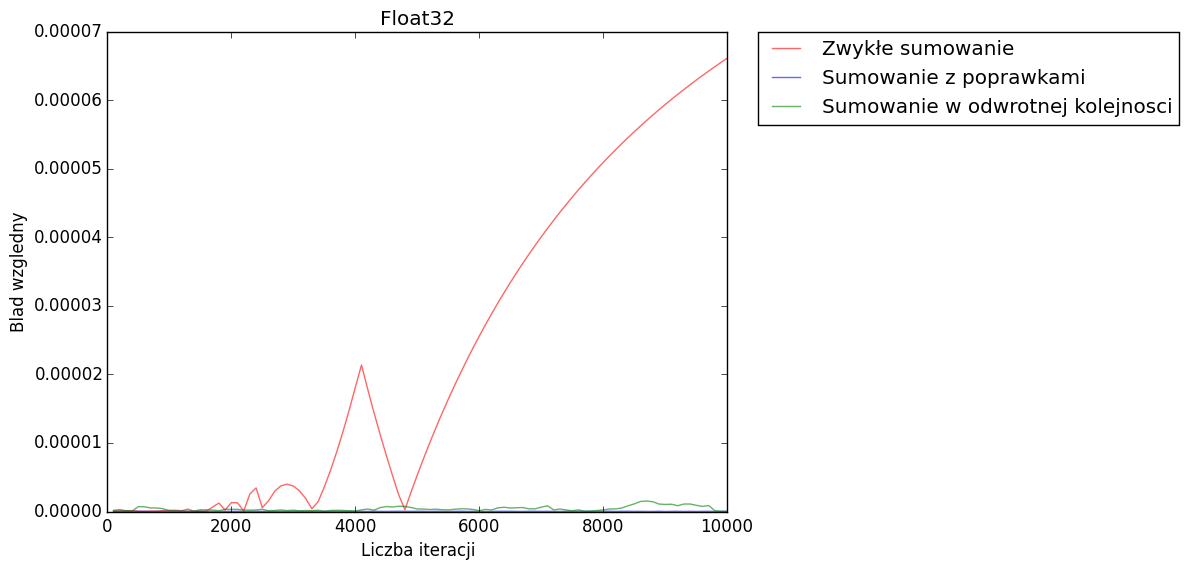

In [4]:
fig, ax = subplots()

initPlot("Float32", "Liczba iteracji", "Blad wzgledny")
x = getPlotX()
y1 = sumMistakes(Float32, [1:plotMax;], sum, squareSum)
y2 = sumMistakes(Float32, [1:plotMax;], sumWithCorrection, squareSum)
y3 = sumMistakes(Float32, reverse([1:plotMax;]), sum, squareSum)

ax[:plot](x, y1, "-", color="red", linewidth=1, alpha=0.6, label="Zwykłe sumowanie")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:plot](x, y3, "-", color="green", linewidth=1, alpha=0.6, label="Sumowanie w odwrotnej kolejnosci")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float32")
endResults(y1[end], y2[end], y3[end])

show()

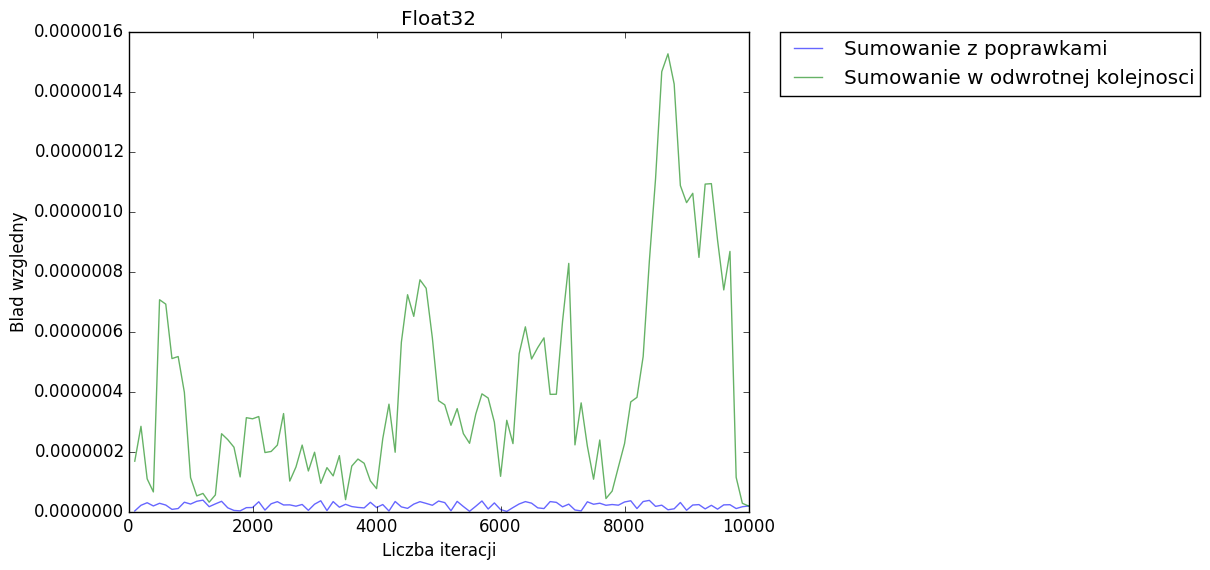

In [5]:
fig, ax = subplots()
initPlot("Float32", "Liczba iteracji", "Blad wzgledny")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:plot](x, y3, "-", color="green", linewidth=1, alpha=0.6, label="Sumowanie w odwrotnej kolejnosci")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float32")


show()

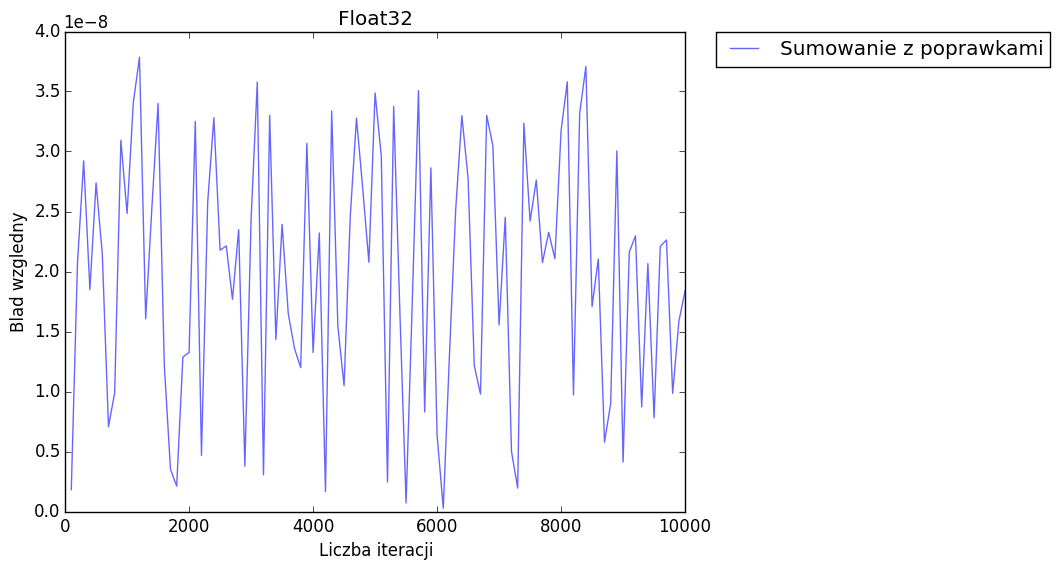

In [6]:
fig, ax = subplots()
initPlot("Float32", "Liczba iteracji", "Blad wzgledny")

initPlot("Float32", "Liczba iteracji", "Blad wzgledny")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

show()

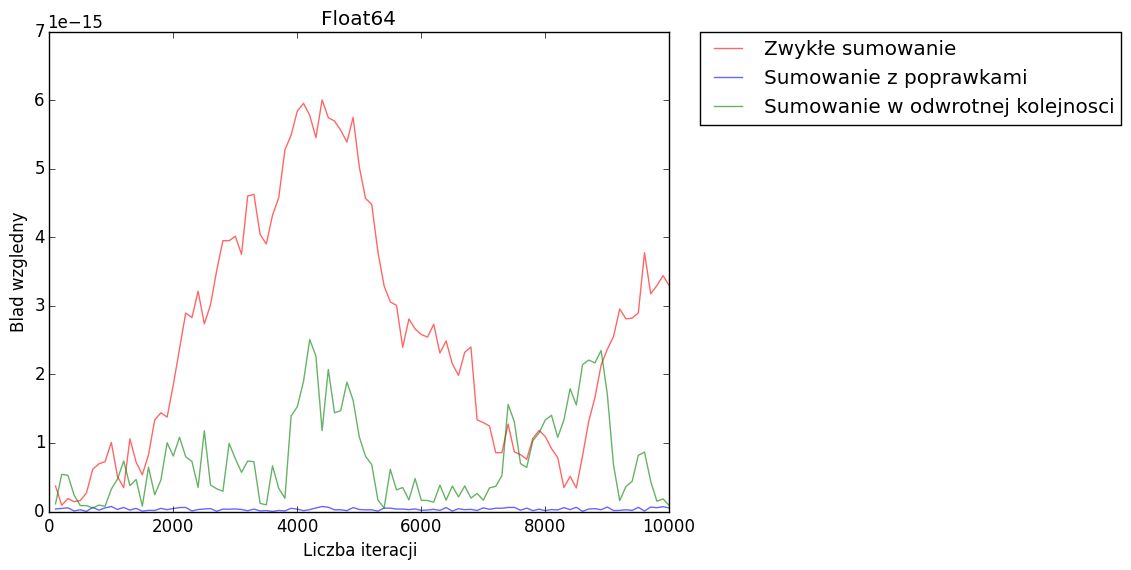

Końcowy błąd względny
Zwykłe sumowanie: 3.2906069885365725e-15
Sumowanie z poprawkami: 5.072364138943229e-17
Sumowanie w odwrotnej kolejności: 8.427149807503187e-17


In [7]:
fig, ax = subplots()

initPlot("Float64", "Liczba iteracji", "Blad wzgledny")
x = getPlotX()
y1 = sumMistakes(Float64, [1:plotMax;], sum, squareSum)
y2 = sumMistakes(Float64, [1:plotMax;], sumWithCorrection, squareSum)
y3 = sumMistakes(Float64, reverse([1:plotMax;]), sum, squareSum)

ax[:plot](x, y1, "-", color="red", linewidth=1, alpha=0.6, label="Zwykłe sumowanie")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:plot](x, y3, "-", color="green", linewidth=1, alpha=0.6, label="Sumowanie w odwrotnej kolejnosci")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float64")

endResults(y1[end], y2[end], y3[end])
show()

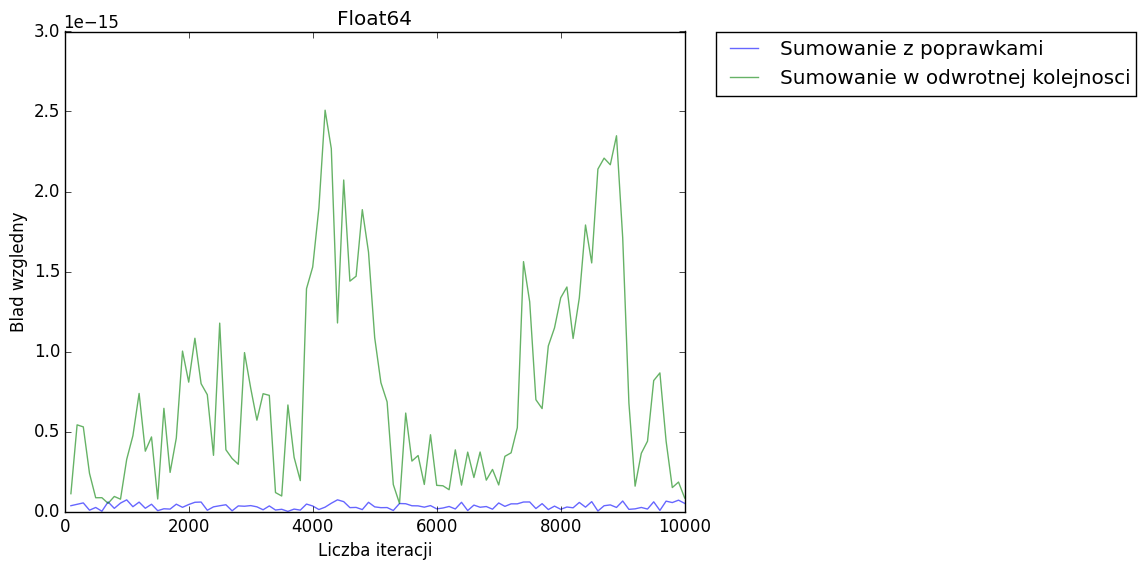

In [8]:
fig, ax = subplots()

initPlot("Float64", "Liczba iteracji", "Blad wzgledny")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:plot](x, y3, "-", color="green", linewidth=1, alpha=0.6, label="Sumowanie w odwrotnej kolejnosci")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float64")
show()

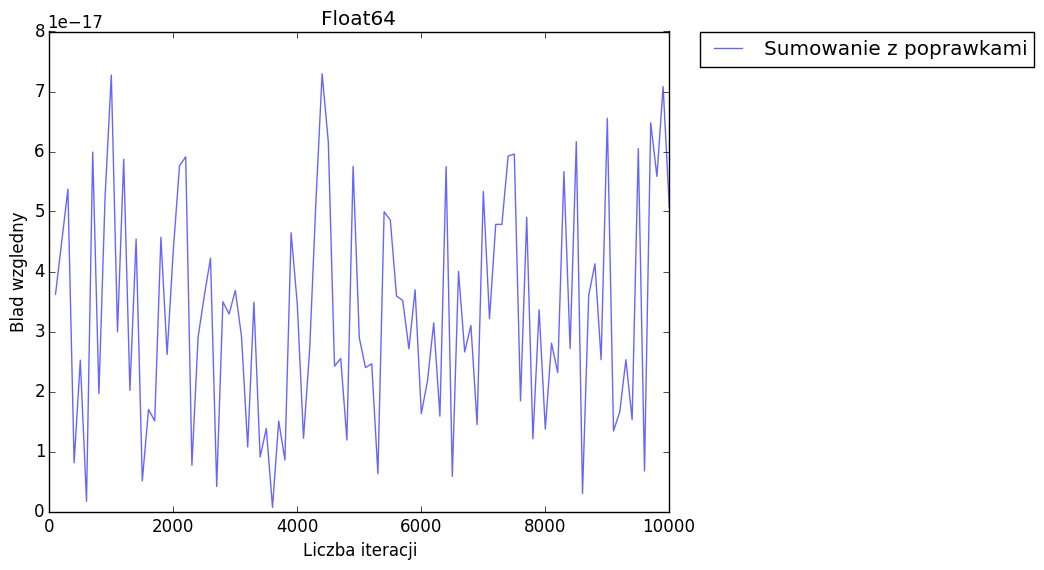

In [9]:
fig, ax = subplots()

initPlot("Float64", "Liczba iteracji", "Blad wzgledny")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float64")
show()

#  Sumowanie ciągu $\frac{1}{n}$

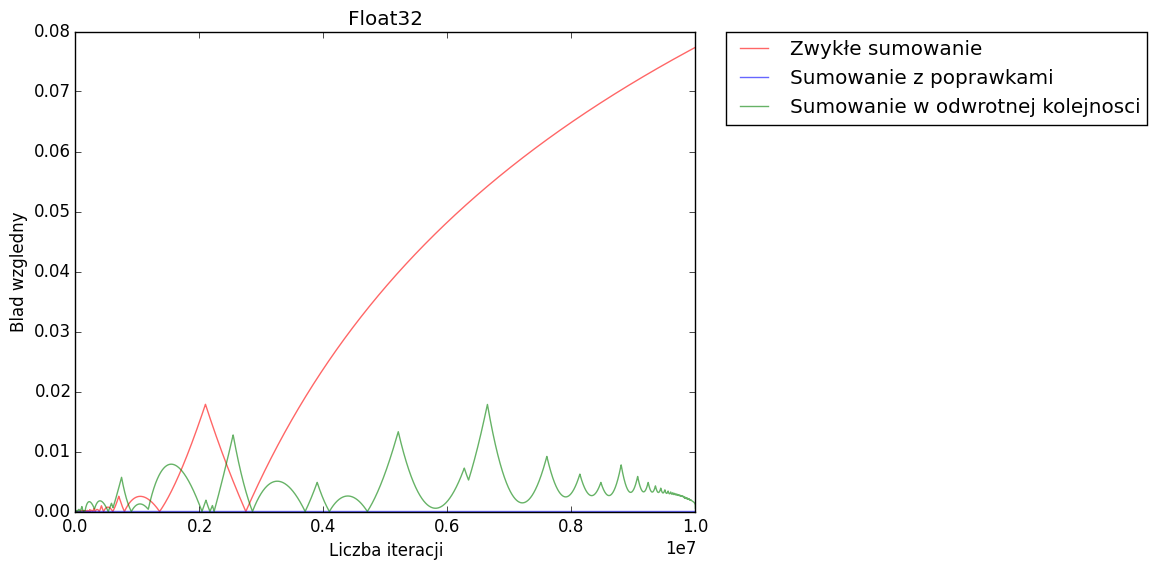

Końcowy błąd względny
Zwykłe sumowanie: 0.0773647540207523
Sumowanie z poprawkami: 4.631291191184543e-8
Sumowanie w odwrotnej kolejności: 0.0005558461357057473


In [10]:
plotMax = 10000000
plotdx = 1000
fig, ax = subplots()
initPlot("Float32", "Liczba iteracji", "Blad wzgledny")

x = getPlotX()
y1 = sumMistakes(Float32, [1:plotMax;], sum, linearSum)
y2 = sumMistakes(Float32, [1:plotMax;], sumWithCorrection, linearSum)
y3 = sumMistakes(Float32, reverse([1:plotMax;]), sum, linearSum)

ax[:plot](x, y1, "-", color="red", linewidth=1, alpha=0.6, label="Zwykłe sumowanie")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:plot](x, y3, "-", color="green", linewidth=1, alpha=0.6, label="Sumowanie w odwrotnej kolejnosci")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float32")

endResults(y1[end], y2[end], y3[end])

show()

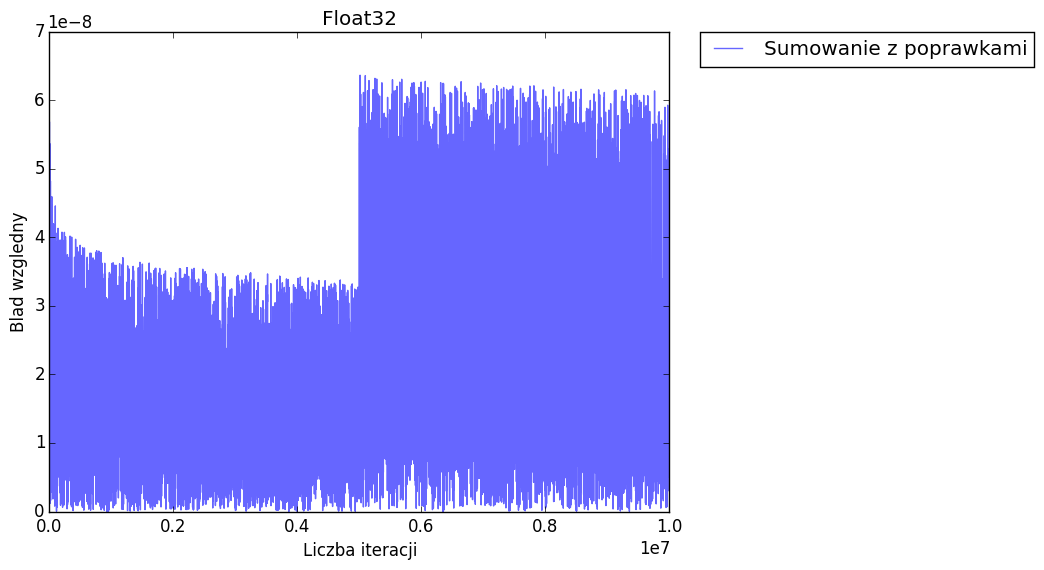

In [11]:
fig, ax = subplots()
initPlot("Float32", "Liczba iteracji", "Blad wzgledny")
ax[:plot](x, y2, "-", color="blue", linewidth=1, alpha=0.6, label="Sumowanie z poprawkami")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("Float32")

show()

# Doświadczalne wyznaczanie asymptotycznego tempa wzrostu błędu algorytmu Kahana

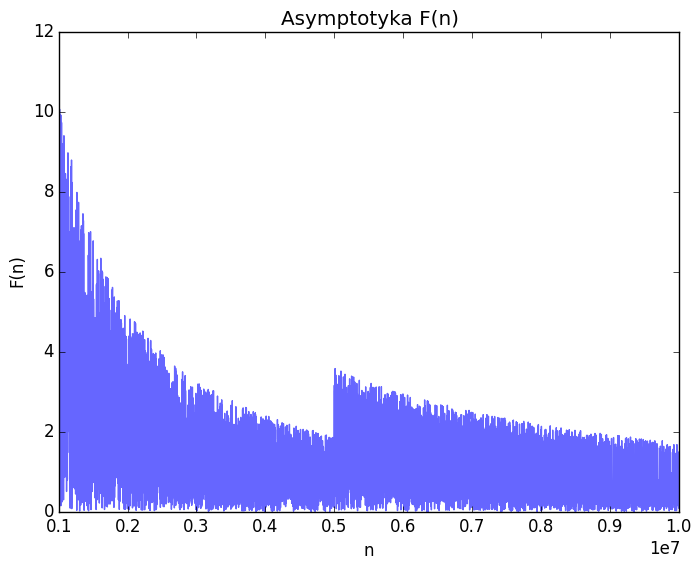

Końcowa wartość F(n): 1.3035925801789354


In [12]:
fig, ax = subplots()
initPlot("Asymptotyka F(n)", "n", "F(n)")

y2Complex = empiricComplexity(Float32, y2, 2)
ax[:plot](x[1000:end], y2Complex[1000:end], "-", color="blue", linewidth=1, alpha=0.6)
println("Końcowa wartość F(n): ", y2Complex[end])

show()